# Proyecto Final - Aprendizaje Automático - Diego Estrada

## Problema de interés: Calidad de agua en el Río de la Plata

##  Analisis exploratorio de los datos (EDA)

Comenzamos cargando el dataset unificado al notebook

In [1]:
import os
import pandas as pd

#Ruta del archivo unificado
ruta_archivo = r'C:\Users\destrada\Ciencia_datos_2A1C\Cookiecutter_Proyecto_Final\data\processed\df_final_Unificado.csv'

#Verificamos si el archivo existe y lo cargamos
if os.path.exists(ruta_archivo):
    df_final = pd.read_csv(ruta_archivo)
else:
    print("El archivo no fue encontrado en la ruta especificada.")

#Mostramos la primeras filas
df_final.head()

,año,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,...,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua,campaña_invierno,campaña_otono,campaña_primavera,campaña_verano
0,2013,10.3,14.5,0.7,7.9,0,0,0,0,130.0,...,0.006,0.002,10.0,0.5,62.0,2,1,0,0,0
1,2013,10.5,14.5,0.5,7.5,0,0,0,0,490.0,...,0.006,0.002,10.0,0.5,50.0,2,1,0,0,0
2,2013,10.6,14.5,0.5,7.5,0,0,0,0,34.8,...,0.006,0.002,10.0,0.5,27.0,3,1,0,0,0
3,2013,10.4,14.5,0.7,7.4,0,0,0,0,330.0,...,0.006,0.002,10.0,0.5,54.0,2,1,0,0,0
4,2013,10.3,14.5,0.8,7.5,0,0,0,0,91.8,...,0.006,0.002,10.0,0.5,26.0,3,1,0,0,0


Vamos a observar las Estadística Descriptivas, esto nos ayudara a tener una vision clara y rapida de como estan disctribuido y estructurado los datos. 

In [3]:
#Estadísticas generales
print(df_final.describe())

#Medianas de cada columna
print(df_final.median(numeric_only=True))

               año     tem_agua     tem_aire           od           ph  \
count  1182.000000  1182.000000  1182.000000  1182.000000  1182.000000   
mean   2019.210660    19.242919    15.170228     6.238376     7.532741   
std       3.118944     4.928343     5.562601     2.427765     0.617054   
min    2013.000000     6.000000     0.210000     0.200000     1.090000   
25%    2016.000000    15.100000    14.000000     4.955000     7.292500   
50%    2019.000000    20.000000    14.500000     6.325000     7.540000   
75%    2022.000000    23.000000    16.000000     7.700000     7.800000   
max    2024.000000    29.900000    33.000000    17.610000    10.500000   

            olores        color      espumas     mat_susp  \
count  1182.000000  1182.000000  1182.000000  1182.000000   
mean      0.051607     0.060914     0.040609     0.148900   
std       0.221327     0.239273     0.197467     0.356141   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000

Luego, vamos a visualizar las distribuciones entre las variables. Esto nos ayudará a identificar patrones, detectar errores y tener una visión más clara para tomar decisiones antes de entrenar el modelo.

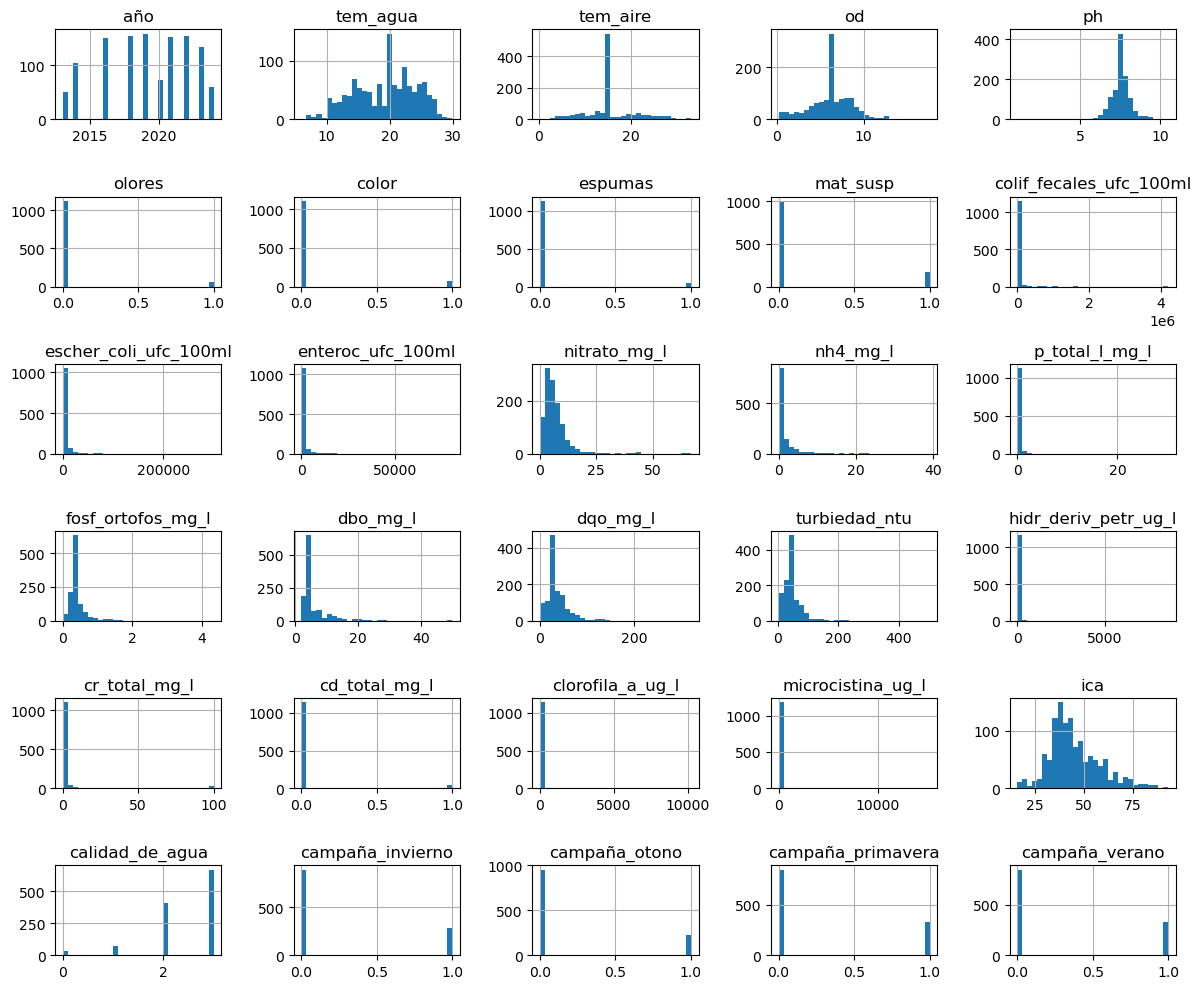

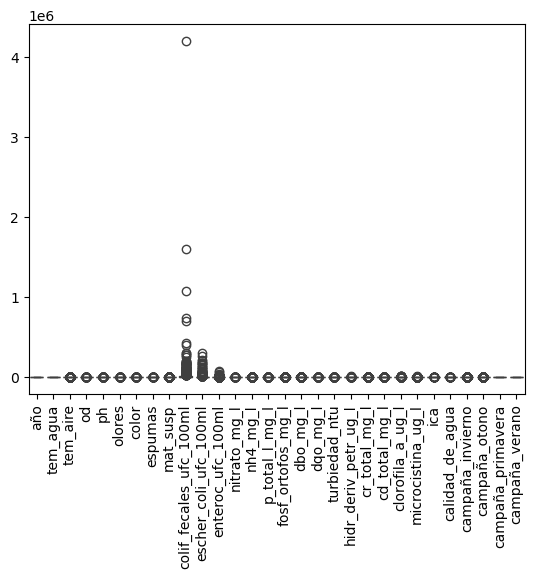

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#Realizamos varios Histogramas entres las variables
df_final.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

#Boxplot para detectar outliers en las variables
sns.boxplot(data=df_final.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.show()

El gráfico boxplot se puede obsrevar la presencia de valores extremadamente altos, conocidos como outliers, que afectan negativamente la visualización y el análisis de los datos. Vamos a aplicar un tratamiento de reemplazo, ajustando los valores atípicos mediante el método del rango intercuartílico (IQR) para reducir su impacto sin eliminar registros.

In [22]:
df_final[['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml']].describe()

,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml
count,1.182000e+03,1182.000000,1182.000000
mean,2.104322e+04,5839.908122,1148.932479
std,1.413372e+05,20849.986647,4124.499353
min,1.000000e+00,1.000000,1.190000
25%,1.000000e+03,300.000000,160.000000
50%,3.050000e+03,900.000000,300.000000
75%,1.000000e+04,3000.000000,557.500000
max,4.200000e+06,300001.000000,80600.000000


Aplicamos el método del rango intercuartílico (IQR)

In [29]:
#Lista de variables con outliers
variables_outliers = ['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml']

#Creamos una copia del DataFrame original para trabajar sin modificar df_final
df_limpio = df_final.copy()

#Aplicamos el reemplazo para cada variable
for var in variables_outliers:
    Q1 = df_limpio[var].quantile(0.25)
    Q3 = df_limpio[var].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    #Reemplazamos valores extremos por los límites
    df_limpio[var] = df_limpio[var].clip(lower=limite_inferior, upper=limite_superior)

#Mostramos las estadísticas después del reemplazo
print(df_limpio[variables_outliers].describe())

       colif_fecales_ufc_100ml  escher_coli_ufc_100ml  enteroc_ufc_100ml
count              1182.000000            1182.000000        1182.000000
mean               6985.774873            2113.342132         419.821861
std                8184.644067            2476.343550         373.459810
min                   1.000000               1.000000           1.190000
25%                1000.000000             300.000000         160.000000
50%                3050.000000             900.000000         300.000000
75%               10000.000000            3000.000000         557.500000
max               23500.000000            7050.000000        1153.750000


Vamos a continuar analizando la matriz de correlación para identificar qué variables presentan relaciones entre sí. Este paso es clave para detectar correlaciones lineales que puedan ser útiles en el análisis exploratorio y en la construcción del modelo supervisado que desarrollaremos.

In [32]:
#Calcular y mostrar la matriz de correlación numérica
correlaciones = df_final.corr(numeric_only=True)
correlaciones

,año,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,...,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua,campaña_invierno,campaña_otono,campaña_primavera,campaña_verano
año,1.000000,0.090345,0.272626,0.043395,-0.033773,0.137565,0.152983,0.057589,0.257596,0.065368,...,0.104036,0.229168,0.015684,-0.012514,-0.009851,0.102918,-0.159144,0.098020,0.006413,0.059210
tem_agua,0.090345,1.000000,0.396691,-0.240283,-0.235253,-0.055976,0.011008,-0.073312,-0.003620,-0.075342,...,-0.124670,-0.044431,-0.037345,0.004222,0.018192,-0.039018,-0.589821,-0.290612,0.297088,0.520656
tem_aire,0.272626,0.396691,1.000000,-0.139206,-0.133988,0.055280,0.076261,-0.033649,0.138371,-0.035914,...,-0.035874,0.013906,-0.026375,-0.008567,-0.006263,-0.016724,-0.236965,-0.179649,0.092072,0.291821
od,0.043395,-0.240283,-0.139206,1.000000,0.401642,-0.082930,-0.147401,0.000712,-0.096985,-0.077041,...,0.085440,0.016948,0.055393,0.016958,0.272766,-0.192161,0.045419,0.103833,-0.007640,-0.126988
ph,-0.033773,-0.235253,-0.133988,0.401642,1.000000,-0.059503,-0.071615,-0.032394,-0.129935,-0.031584,...,0.050234,0.017109,0.078399,0.011242,0.079054,-0.040454,0.043804,0.076915,0.000988,-0.110421
olores,0.137565,-0.055976,0.055280,-0.082930,-0.059503,1.000000,0.452238,0.378238,0.289150,0.175640,...,0.042288,-0.044828,-0.015593,-0.006899,-0.164187,0.102199,0.055194,-0.027267,-0.044479,0.015880
color,0.152983,0.011008,0.076261,-0.147401,-0.071615,0.452238,1.000000,0.323943,0.360489,0.041880,...,0.008591,-0.048768,-0.026119,-0.007655,-0.093906,0.051715,-0.053476,-0.008496,-0.002712,0.061207
espumas,0.057589,-0.073312,-0.033649,0.000712,-0.032394,0.378238,0.323943,1.000000,0.214952,0.066165,...,-0.030866,-0.016043,-0.023200,-0.005937,-0.095552,0.049529,0.023443,0.007597,-0.033923,0.004938
mat_susp,0.257596,-0.003620,0.138371,-0.096985,-0.129935,0.289150,0.360489,0.214952,1.000000,0.029448,...,-0.029149,-0.028473,-0.045140,-0.012399,-0.141058,0.116813,-0.037325,-0.066734,0.017246,0.077019
colif_fecales_ufc_100ml,0.065368,-0.075342,-0.035914,-0.077041,-0.031584,0.175640,0.041880,0.066165,0.029448,1.000000,...,-0.000398,-0.025499,0.004749,-0.004261,-0.128495,0.097345,0.090227,0.007225,-0.039504,-0.052859


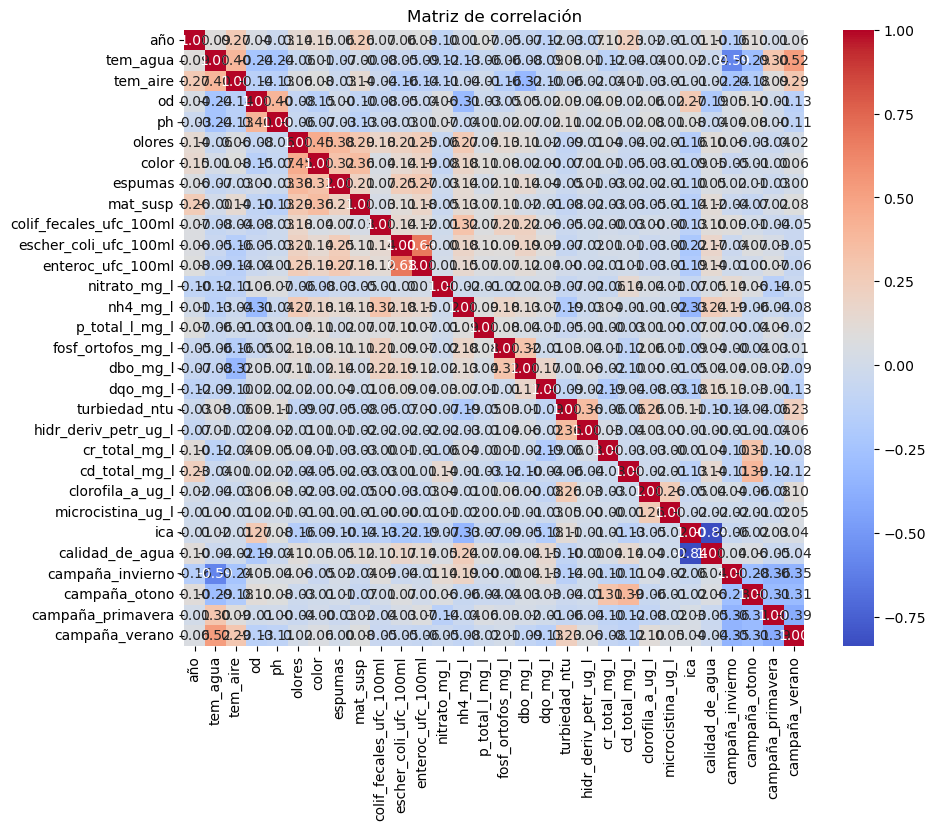

In [15]:
#Visualizar mapa de calor si lo querés ver igual
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()